In [224]:
%matplotlib notebook

In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [226]:
population_estimates = pd.read_csv("Population-EstimatesData.csv")
population_estimates.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.201290,...,54.244434,54.356396,54.502067,54.676725,54.874161,55.102246,55.331887,55.562180,55.789065,56.009450
1,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.947790,...,12.973244,13.345549,13.732773,14.132766,14.544481,14.946251,15.349197,15.755873,16.168726,16.589418
2,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.872972,...,40.757181,40.542064,40.345297,40.162781,39.987572,39.845466,39.699291,39.546177,39.380479,39.197560
3,Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "Country Name", "Indicator Name", "1970", "2020",
reduced_df = population_estimates[["Country Name", "Indicator Name", "1970", "2020"]]
reduced_df.head()

,Country Name,Indicator Name,1970,2020
0,Arab World,Age dependency ratio (% of working-age populat...,94.226666,61.020120
1,Arab World,"Age dependency ratio, old",7.073558,7.593050
2,Arab World,"Age dependency ratio, young",86.848912,51.954725
3,Arab World,"Age population, age 00, female, interpolated",NaN,NaN
4,Arab World,"Age population, age 00, male, interpolated",NaN,NaN


In [228]:
# Set new index to Country Name
df = reduced_df.set_index("Country Name")
df.head()

,Indicator Name,1970,2020
Country Name,,,
Arab World,Age dependency ratio (% of working-age populat...,94.226666,61.020120
Arab World,"Age dependency ratio, old",7.073558,7.593050
Arab World,"Age dependency ratio, young",86.848912,51.954725
Arab World,"Age population, age 00, female, interpolated",NaN,NaN
Arab World,"Age population, age 00, male, interpolated",NaN,NaN


In [229]:
# Grab the eight regions we'll be using
reduced_df2 = df.loc[["Central Europe and the Baltics", "East Asia & Pacific", "European Union",
                                "Latin America & Caribbean", "Middle East & North Africa", "South Asia", "Sub-Saharan Africa", "United States"]]
reduced_df2

,Indicator Name,1970,2020
Country Name,,,
Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.316262e+01
Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,2.976632e+01
Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,2.335613e+01
Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN
Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...
United States,Rural population growth (annual %),1.511424e-01,NaN
United States,Sex ratio at birth (male births per female bir...,NaN,NaN
United States,Urban population,1.509224e+08,2.743740e+08


In [230]:
#Move the Country Name index back into a column
reduced_df3 = reduced_df2.reset_index(level='Country Name')
reduced_df3

,Country Name,Indicator Name,1970,2020
0,Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.316262e+01
1,Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,2.976632e+01
2,Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,2.335613e+01
3,Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN
4,Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...,...
1395,United States,Rural population growth (annual %),1.511424e-01,NaN
1396,United States,Sex ratio at birth (male births per female bir...,NaN,NaN
1397,United States,Urban population,1.509224e+08,2.743740e+08
1398,United States,Urban population (% of total population),7.360200e+01,8.266400e+01


In [231]:
#Makes sure Country Name is now a column
reduced_df3.columns

Index(['Country Name', 'Indicator Name', '1970', '2020'], dtype='object')

In [232]:
# Set new index to Indicator Name
reduced_df4 = reduced_df3.set_index("Indicator Name")
reduced_df4.head()

,Country Name,1970,2020
Indicator Name,,,
Age dependency ratio (% of working-age population),Central Europe and the Baltics,52.375566,53.162625
"Age dependency ratio, old",Central Europe and the Baltics,14.387453,29.766316
"Age dependency ratio, young",Central Europe and the Baltics,37.922797,23.356127
"Age population, age 00, female, interpolated",Central Europe and the Baltics,NaN,NaN
"Age population, age 00, male, interpolated",Central Europe and the Baltics,NaN,NaN


In [233]:
# Grab the Urban population (% of total population) indicator name
reduced_df5 = reduced_df4.loc[["Urban population (% of total population)"]]
reduced_df5

,Country Name,1970,2020
Indicator Name,,,
Urban population (% of total population),Central Europe and the Baltics,50.780276,62.551291
Urban population (% of total population),East Asia & Pacific,24.952469,60.694853
Urban population (% of total population),European Union,65.672896,76.117928
Urban population (% of total population),Latin America & Caribbean,57.266616,81.068041
Urban population (% of total population),Middle East & North Africa,42.653945,65.968229
Urban population (% of total population),South Asia,18.637719,34.883009
Urban population (% of total population),Sub-Saharan Africa,18.125077,41.252152
Urban population (% of total population),United States,73.602000,82.664000


In [234]:
#check the datatypes
reduced_df5.dtypes

Country Name     object
1970            float64
2020            float64
dtype: object

In [235]:
#convert the 1970 column and 2020 column to integers rather than floats
cols = ['1970', '2020']
reduced_df5[cols] = reduced_df5[cols].applymap(np.int64)
reduced_df5

,Country Name,1970,2020
Indicator Name,,,
Urban population (% of total population),Central Europe and the Baltics,50,62
Urban population (% of total population),East Asia & Pacific,24,60
Urban population (% of total population),European Union,65,76
Urban population (% of total population),Latin America & Caribbean,57,81
Urban population (% of total population),Middle East & North Africa,42,65
Urban population (% of total population),South Asia,18,34
Urban population (% of total population),Sub-Saharan Africa,18,41
Urban population (% of total population),United States,73,82


In [236]:
#Move the Indicator Name index back into a column
reduced_df6 = reduced_df5.reset_index(level='Indicator Name')
reduced_df6

,Indicator Name,Country Name,1970,2020
0,Urban population (% of total population),Central Europe and the Baltics,50,62
1,Urban population (% of total population),East Asia & Pacific,24,60
2,Urban population (% of total population),European Union,65,76
3,Urban population (% of total population),Latin America & Caribbean,57,81
4,Urban population (% of total population),Middle East & North Africa,42,65
5,Urban population (% of total population),South Asia,18,34
6,Urban population (% of total population),Sub-Saharan Africa,18,41
7,Urban population (% of total population),United States,73,82


In [237]:
# Reorganizing the columns where Country Name comes before Indicator Name
organized_df = reduced_df6[["Country Name","Indicator Name","1970","2020"]]
organized_df.head()

,Country Name,Indicator Name,1970,2020
0,Central Europe and the Baltics,Urban population (% of total population),50,62
1,East Asia & Pacific,Urban population (% of total population),24,60
2,European Union,Urban population (% of total population),65,76
3,Latin America & Caribbean,Urban population (% of total population),57,81
4,Middle East & North Africa,Urban population (% of total population),42,65


In [238]:
#Create New df
organized_df2=organized_df.copy()

In [239]:
# Create our difference column
organized_df2["Difference"] = organized_df2["2020"]-organized_df["1970"]
organized_df2

,Country Name,Indicator Name,1970,2020,Difference
0,Central Europe and the Baltics,Urban population (% of total population),50,62,12
1,East Asia & Pacific,Urban population (% of total population),24,60,36
2,European Union,Urban population (% of total population),65,76,11
3,Latin America & Caribbean,Urban population (% of total population),57,81,24
4,Middle East & North Africa,Urban population (% of total population),42,65,23
5,South Asia,Urban population (% of total population),18,34,16
6,Sub-Saharan Africa,Urban population (% of total population),18,41,23
7,United States,Urban population (% of total population),73,82,9


In [240]:
#Sort the Difference column from high to low
high_to_low = organized_df2.sort_values("Difference", ascending=False)
high_to_low

,Country Name,Indicator Name,1970,2020,Difference
1,East Asia & Pacific,Urban population (% of total population),24,60,36
3,Latin America & Caribbean,Urban population (% of total population),57,81,24
4,Middle East & North Africa,Urban population (% of total population),42,65,23
6,Sub-Saharan Africa,Urban population (% of total population),18,41,23
5,South Asia,Urban population (% of total population),18,34,16
0,Central Europe and the Baltics,Urban population (% of total population),50,62,12
2,European Union,Urban population (% of total population),65,76,11
7,United States,Urban population (% of total population),73,82,9


In [241]:
# Set x axis and tick locations
x_axis = np.arange(len(high_to_low))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


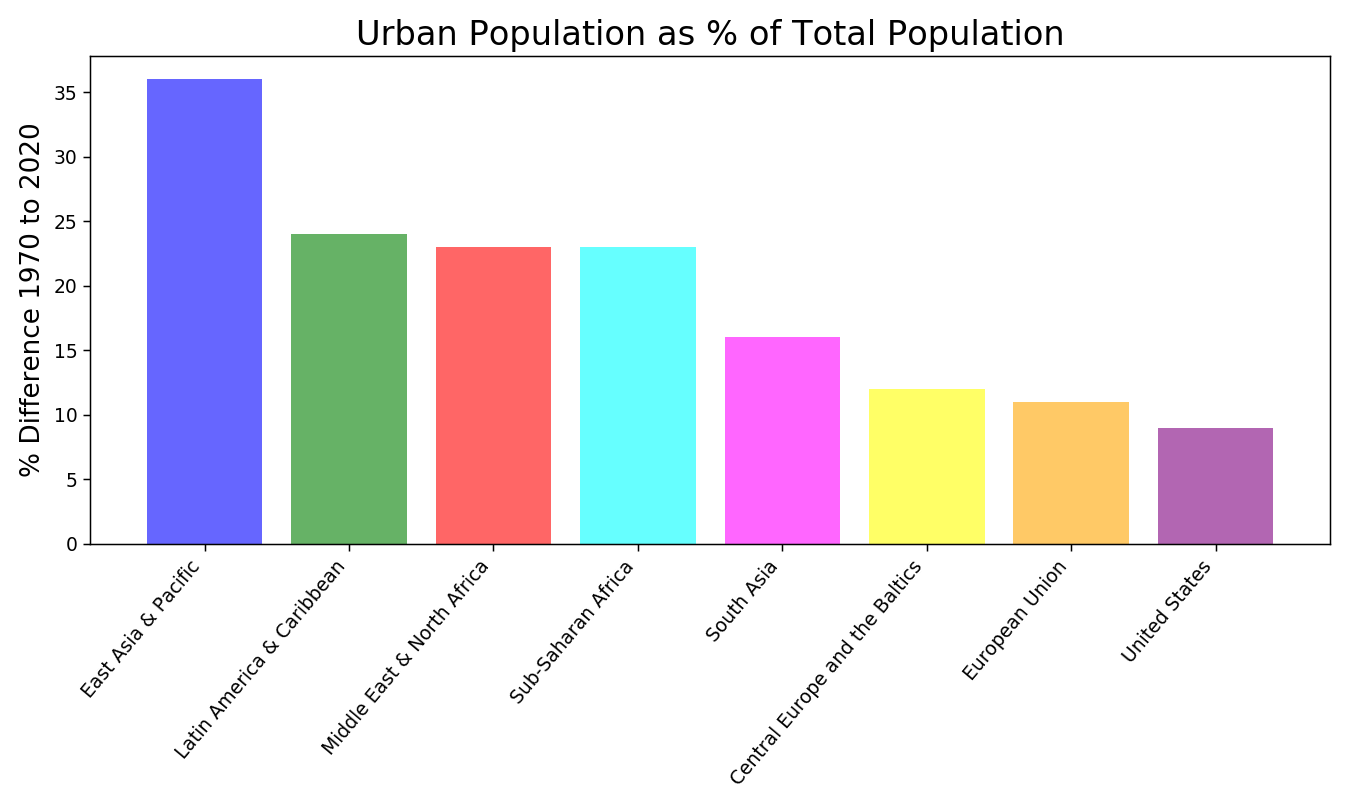

([<matplotlib.axis.XTick at 0x265a47d2c88>,
 <a list of 8 Text xticklabel objects>)

In [242]:
# Create a list indicating how to write x labels and set figure size
plt.figure(figsize=(10,6))
plt.bar(x_axis, high_to_low["Difference"], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple'], alpha=0.6, align="center")
plt.xticks(tick_locations, high_to_low["Country Name"], rotation=50, ha='right')

In [243]:
# Set a Title and labels and save our figure
plt.tight_layout()
plt.title("Urban Population as % of Total Population", fontsize=18)
plt.ylabel("% Difference 1970 to 2020", fontsize=14)
plt.tight_layout()
plt.savefig("Urban_pop.png")

In [244]:
# To create our next graph now using Rural population (% of total population), go back to df where we grabbed our Indicator Name
reduced_df_rural = reduced_df4.loc[["Rural population (% of total population)"]]
reduced_df_rural

,Country Name,1970,2020
Indicator Name,,,
Rural population (% of total population),Central Europe and the Baltics,49.219724,37.448709
Rural population (% of total population),East Asia & Pacific,75.047531,39.305147
Rural population (% of total population),European Union,34.327104,23.882072
Rural population (% of total population),Latin America & Caribbean,42.733384,18.931959
Rural population (% of total population),Middle East & North Africa,57.346055,34.031771
Rural population (% of total population),South Asia,81.362281,65.116991
Rural population (% of total population),Sub-Saharan Africa,81.874923,58.747848
Rural population (% of total population),United States,26.398000,17.336000


In [245]:
#convert the 1970 column and 2020 column to integers rather than floats
cols = ['1970', '2020']
reduced_df_rural[cols] = reduced_df_rural[cols].applymap(np.int64)
reduced_df_rural

,Country Name,1970,2020
Indicator Name,,,
Rural population (% of total population),Central Europe and the Baltics,49,37
Rural population (% of total population),East Asia & Pacific,75,39
Rural population (% of total population),European Union,34,23
Rural population (% of total population),Latin America & Caribbean,42,18
Rural population (% of total population),Middle East & North Africa,57,34
Rural population (% of total population),South Asia,81,65
Rural population (% of total population),Sub-Saharan Africa,81,58
Rural population (% of total population),United States,26,17


In [246]:
#Move the Indicator Name index back into a column
reduced_df_rural2 = reduced_df_rural.reset_index(level='Indicator Name')
reduced_df_rural2

,Indicator Name,Country Name,1970,2020
0,Rural population (% of total population),Central Europe and the Baltics,49,37
1,Rural population (% of total population),East Asia & Pacific,75,39
2,Rural population (% of total population),European Union,34,23
3,Rural population (% of total population),Latin America & Caribbean,42,18
4,Rural population (% of total population),Middle East & North Africa,57,34
5,Rural population (% of total population),South Asia,81,65
6,Rural population (% of total population),Sub-Saharan Africa,81,58
7,Rural population (% of total population),United States,26,17


In [247]:
# Reorganizing the columns where Country Name comes before Indicator Name
organized_rural = reduced_df_rural2[["Country Name","Indicator Name","1970","2020"]]
organized_rural.head()

,Country Name,Indicator Name,1970,2020
0,Central Europe and the Baltics,Rural population (% of total population),49,37
1,East Asia & Pacific,Rural population (% of total population),75,39
2,European Union,Rural population (% of total population),34,23
3,Latin America & Caribbean,Rural population (% of total population),42,18
4,Middle East & North Africa,Rural population (% of total population),57,34


In [248]:
#Create New df
organized_rural2=organized_rural.copy()

In [249]:
# Create our difference column
organized_rural2["Difference"] = organized_rural2["2020"]-organized_rural2["1970"]
organized_rural2

,Country Name,Indicator Name,1970,2020,Difference
0,Central Europe and the Baltics,Rural population (% of total population),49,37,-12
1,East Asia & Pacific,Rural population (% of total population),75,39,-36
2,European Union,Rural population (% of total population),34,23,-11
3,Latin America & Caribbean,Rural population (% of total population),42,18,-24
4,Middle East & North Africa,Rural population (% of total population),57,34,-23
5,South Asia,Rural population (% of total population),81,65,-16
6,Sub-Saharan Africa,Rural population (% of total population),81,58,-23
7,United States,Rural population (% of total population),26,17,-9


In [250]:
#Sort the Difference column from high to low
high_to_low_rural = organized_rural2.sort_values("Difference", ascending=False)
high_to_low_rural

,Country Name,Indicator Name,1970,2020,Difference
7,United States,Rural population (% of total population),26,17,-9
2,European Union,Rural population (% of total population),34,23,-11
0,Central Europe and the Baltics,Rural population (% of total population),49,37,-12
5,South Asia,Rural population (% of total population),81,65,-16
4,Middle East & North Africa,Rural population (% of total population),57,34,-23
6,Sub-Saharan Africa,Rural population (% of total population),81,58,-23
3,Latin America & Caribbean,Rural population (% of total population),42,18,-24
1,East Asia & Pacific,Rural population (% of total population),75,39,-36


In [251]:
# Set x axis and tick locations
x_axis = np.arange(len(high_to_low_rural))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


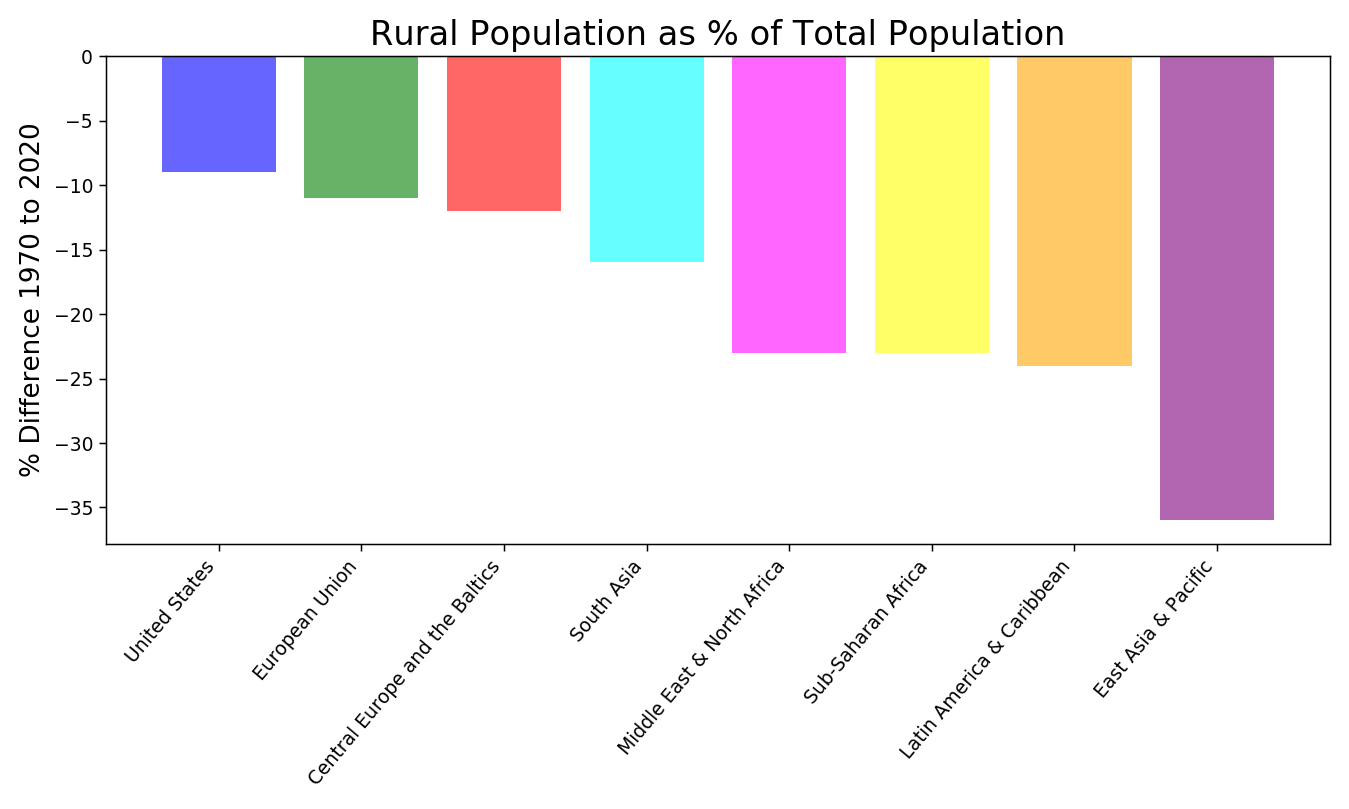

([<matplotlib.axis.XTick at 0x265a7fced48>,
 <a list of 8 Text xticklabel objects>)

In [252]:
# Create a list indicating how to write x labels and set figure size
plt.figure(figsize=(10,6))
plt.bar(x_axis, high_to_low_rural["Difference"], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple'], alpha=0.6, align="center")
plt.xticks(tick_locations, high_to_low_rural["Country Name"], rotation=50, ha='right')

In [253]:
# Set a Title and labels
plt.tight_layout()
plt.title("Rural Population as % of Total Population", fontsize=18)
plt.ylabel("% Difference 1970 to 2020", fontsize=14)
plt.tight_layout()
plt.savefig("Rural_pop.png")